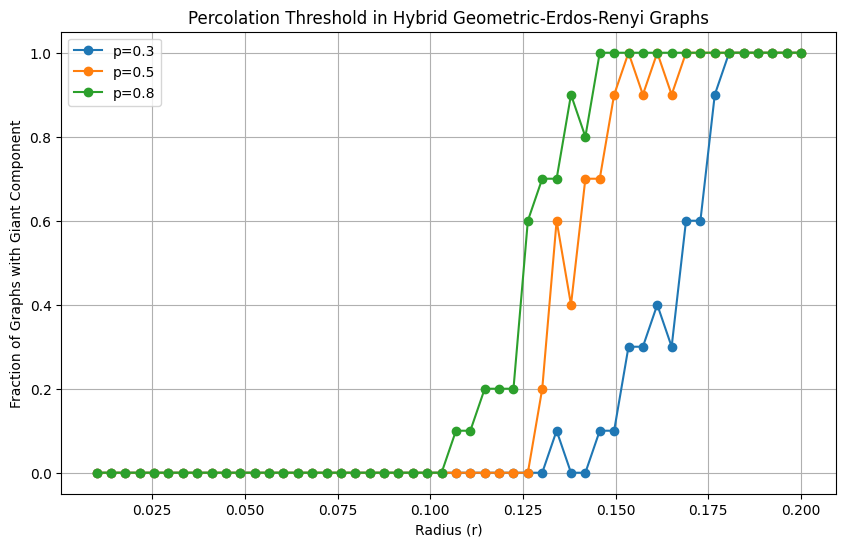

In [139]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of nodes
radius = 0.1  # Radius for connecting nodes in geometric graph
p = 1/n  # Probability for adding edges in Erdos-Renyi graph
num_trials = 10  # Number of trials to estimate the percolation threshold

# Function to generate a hybrid geometric and Erdos-Renyi graph
def generate_hybrid_graph(n, radius, p):
    G = nx.random_geometric_graph(n, radius)
    for i in range(n):
        for j in range(i + 1, n):
            if G.has_edge(i, j) and np.random.rand() > p:
                G.remove_edge(i, j)
    return G

# Function to check if a giant component exists in the graph
def has_giant_component(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc) / n > 0.5  # Giant component threshold (more than 50% of nodes)

# Record the fraction of graphs with a giant component for each radius
giant_component_results = []

radii = np.linspace(0.01, 0.2, 50)  # Range of radii
probabilities = [0.3, 0.5, 0.8]  # Different probabilities to combine with geometric graph

# Run trials for each combination of radius and probability
for p in probabilities:
    results_for_p = []
    for r in radii:
        giant_component_count = 0
        for _ in range(num_trials):
            G = generate_hybrid_graph(n, r, p)
            if has_giant_component(G):
                giant_component_count += 1
        results_for_p.append(giant_component_count / num_trials)
    giant_component_results.append(results_for_p)

# Plot the results
plt.figure(figsize=(10, 6))
for i, p in enumerate(probabilities):
    plt.plot(radii, giant_component_results[i], marker='o', label=f'p={p}')
plt.xlabel('Radius (r)')
plt.ylabel('Fraction of Graphs with Giant Component')
plt.title('Percolation Threshold in Hybrid Geometric-Erdos-Renyi Graphs')
plt.grid(True)
plt.legend()
plt.show()

# # Estimate the percolation threshold for each probability
# for i, p in enumerate(probabilities):
#     threshold_index = np.where(np.array(giant_component_results[i]) >= 0.5)[0][0]
#     approx_threshold = radii[threshold_index]
#     print(f"Estimated percolation threshold for p={p}: {approx_threshold:.3f}")


In [165]:
def compute_percolation_status(graphs, threshold=0.5):
    percolation_status = []
    for G in graphs:
        largest_cc = max(nx.connected_components(G), key=len)
        fraction_largest_cc = len(largest_cc) / len(G)
        percolation_status.append(int(fraction_largest_cc >= threshold))
    return percolation_status



0.05773502691896258
[0]
[[3.03333333]]


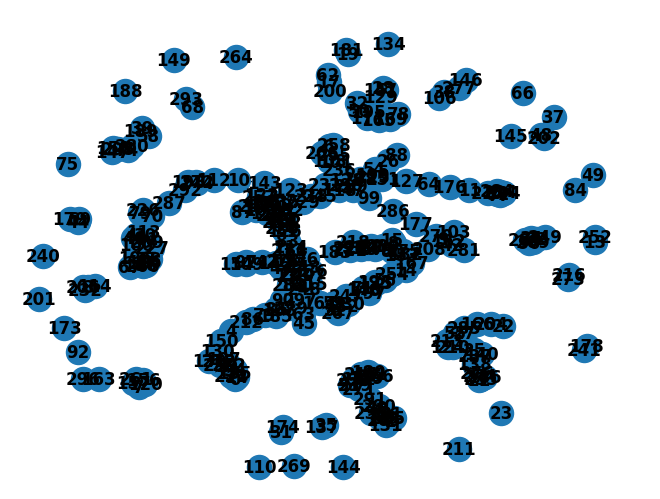

In [208]:
def generate_hybrid_graph(n, radius, p):
    G = nx.random_geometric_graph(n, radius)
    for i in range(n):
        for j in range(i + 1, n):
            if G.has_edge(i, j) and np.random.rand() > p:
                G.remove_edge(i, j)
    return G

def extract_features(graphs):
    features = []
    for G in graphs:
        # Example: compute average degree
        avg_degree = np.mean(list(dict(G.degree()).values()))
        features.append(avg_degree)
        # You can extract more features here
    return np.array(features)[:,np.newaxis]

n=300
radi=(1/n)**0.5
print(radi)
g=generate_hybrid_graph(n, radi, 1)
nx.draw(g, with_labels=True, font_weight='bold')
print(compute_percolation_status([g]))
print(extract_features([g]))

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def generate_hybrid_graph(num_graphs,n, radius, p):
    graphs = []
    graph_radi=[]
    graph_p=[]
    for _ in range(num_graphs):
        G = nx.random_geometric_graph(n, radius)
        for i in range(n):
            for j in range(i + 1, n):
                if G.has_edge(i, j) and np.random.rand() > p:
                    G.remove_edge(i, j)
        graphs.append(G)
        graph_radi.append(radius)
        graph_p.append(p)
    return graphs,graph_radi,graph_p


def compute_percolation_status(graphs, threshold=0.5):
    percolation_status = []
    for G in graphs:
        largest_cc = max(nx.connected_components(G), key=len)
        fraction_largest_cc = len(largest_cc) / len(G)
        percolation_status.append(int(fraction_largest_cc >= threshold))
    return np.array(percolation_status).reshape(-1, 1)

def extract_features(graphs):
    features = []
    for G in graphs:
        # Example: compute average degree
        avg_degree = np.mean(list(dict(G.degree()).values()))
        # mean_distance = nx.average_shortest_path_length(G)
        features.append(avg_degree)
        # You can extract more features here
    return np.array(features)[:,np.newaxis]



# Step 4: Train Classification Model
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf = SVC(kernel='linear')
    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(X_train, y_train)
    return clf, X_test, y_test

# Step 5: Evaluate Model
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

# Generate random graphs
num_graphs = 10
n = 100
radius=2/n**0.5

graphs=[]
graphs_radi=[]
graphs_p=[]
result=[]
p_range = np.linspace(0., 0.5, 20)
# radius_range = np.linspace(0.1, 10/n**0.5, 20)
radius_range = np.linspace(0., 0.2, 20)
for p in p_range:
    for radius in radius_range:
        one_set_of_graph,one_set_of_radi,one_set_of_p=generate_hybrid_graph(num_graphs, n, radius, p) 
        graphs += one_set_of_graph
        graphs_radi += one_set_of_radi
        graphs_p += one_set_of_p
        one_set_of_result= compute_percolation_status(one_set_of_graph)
        result.append(np.sum(one_set_of_result)/num_graphs)

percolation_status = compute_percolation_status(graphs)

# Extract features
X = extract_features(graphs)

graphs_p=np.array(graphs_p).reshape(-1,1)
graphs_radi=np.array(graphs_radi).reshape(-1,1)
# X= np.concatenate((X,graphs_radi,graphs_p),axis=1)

# Train classification model
clf, X_test, y_test = train_model(X, percolation_status)

# Evaluate model
evaluate_model(clf, X_test, y_test)
print(len(graphs_p))

sum(result)/len(result)

Accuracy: 0.94
4000


/home/duan/.conda/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.14400000000000002

In [331]:
# import pandas as pd

# bin_edges = np.linspace(0, np.max(X[:,0]), 10)
# bin_indices = np.digitize(X[:,0], bin_edges)

# # Create a DataFrame for easier manipulation
# data = pd.DataFrame({'x': X[:,0].flatten(), 'y': percolation_status.flatten(), 'bin': bin_indices})

# # Count and sum in bins
# bin_summary = data.groupby('bin').agg({'y': ['count', 'sum']})

# # Plot
# plt.bar(bin_summary.index, bin_summary[('y', 'count')], alpha=0.7, label='Count')
# plt.plot(bin_summary.index, bin_summary[('y', 'sum')], color='red', marker='o', label='Sum')
# plt.xlabel('Bin')
# plt.ylabel('Count/Sum of y-values')
# plt.title('Count and Sum of y-values in Different Bins')
# plt.legend()
# plt.xticks(bin_summary.index)
# plt.grid(True)
# plt.show()

ValueError: X has 1 features, but KNeighborsClassifier is expecting 3 features as input.

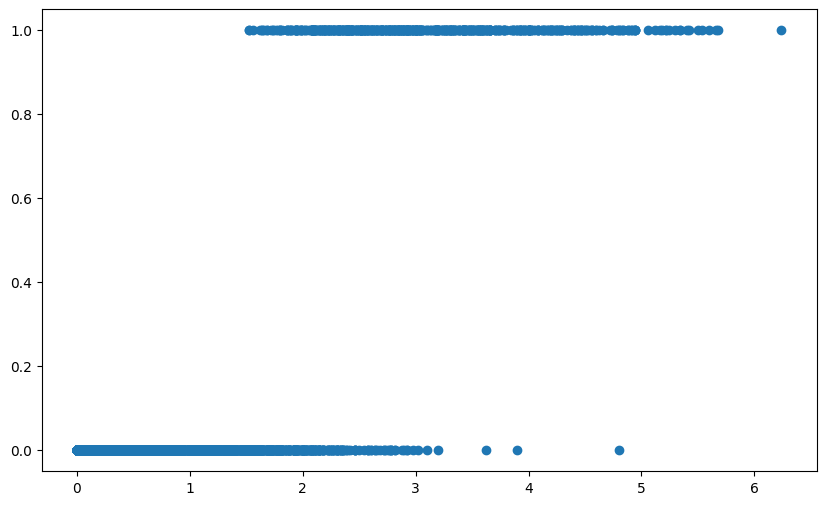

In [371]:
# Plot the results
plt.figure(figsize=(10, 6))
# for i, p in enumerate(p_range):
plt.scatter(X[:,0], percolation_status, marker='o', label=f'radi={radius}')


p_input=np.linspace(0,10,1000).reshape(-1,1)
p_output=clf.predict(p_input) 
plt.scatter(p_input, p_output, marker='x', label=f'radi={radius}')
plt.xlabel('Radius (r)')
plt.ylabel('Fraction of Graphs with Giant Component')
plt.title('Percolation Threshold in Hybrid Geometric-Erdos-Renyi Graphs')
plt.grid(True)
plt.legend()
plt.show()

In [221]:
X.shape

(1000, 1)